##  1D- Convnet Model
## Ch 6. Deep Learning w/ Python
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries  
- **Step 02.** Import dataset (IMDB dataset)  
- **Step 03.** Building and Compiling the model
- **Step 04.** Plotting

#### Step 01. Import libraries

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 02. Import dataset
 - IMDB dataset is used from keras.datasets module  

In [9]:
max_features= 10000
max_len= 500

(x_train, y_train), (x_test, y_test)= keras.datasets.imdb.load_data(num_words= max_features)
print("Train sequences:", len(x_train))
print("Test sequences:", len(x_test))
print("\nPad sequences (samples x time)")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen= max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen= max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Train sequences: 25000
Test sequences: 25000

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


#### Step 03. Building and Compiling the model
###### 1D convnet and RNN for processing long seqeunces  
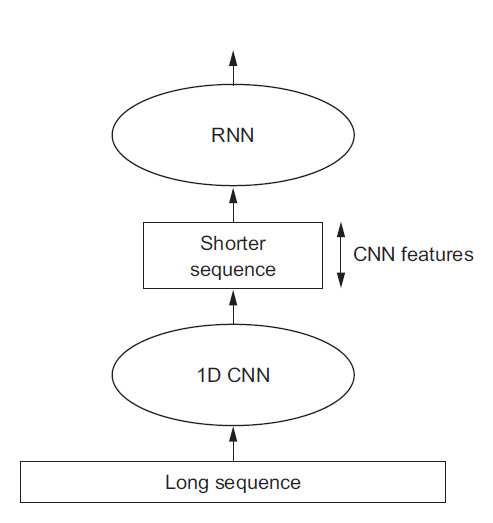

In [14]:
model= keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 128, input_length= max_len))
model.add(keras.layers.Conv1D(32,7,activation= keras.activations.relu))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(32,7,activation= keras.activations.relu))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(1))

model.summary()

model.compile(optimizer= keras.optimizers.RMSprop(learning_rate= 1e-4), 
              loss= keras.losses.binary_crossentropy,
              metrics= ['acc'])
history= model.fit(x_train, y_train,
                  epochs=10,
                  batch_size= 128,
                  validation_split= 0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

#### Step 04. Plotting

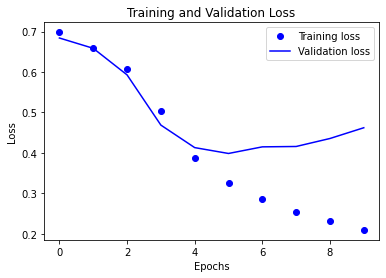

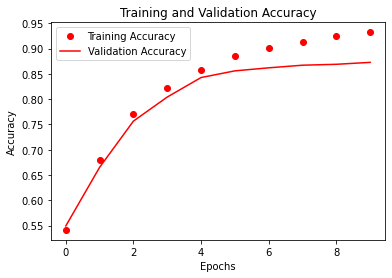

In [18]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["acc"]
val_acc = history.history["val_acc"]

plt.figure()
plt.plot(range(10), loss, "bo", label="Training loss")
plt.plot(range(10), val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(10), acc, "ro", label="Training Accuracy")
plt.plot(range(10), val_acc, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()